In [1]:
import sys
import os

# Add the parent directory (project root) to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [2]:
# Import libraries
import pandas as pd
from scripts.data_loader import load_dataset
from scripts.preprocessing import extract_time_features
from scripts.eda import (
    generate_summary_statistics,
    plot_uhi_boxplots,
    plot_day_night_temperature
)

import warnings
warnings.filterwarnings("ignore")

# Set configurations (e.g., display options)
pd.set_option('display.max_columns', None)

In [3]:
# Define dataset URLs
dallas_url = 'https://raw.githubusercontent.com/riyanshibohra/metropolitan-climate-profiling/main/data/Dallas.csv'
arlington_url = 'https://raw.githubusercontent.com/riyanshibohra/metropolitan-climate-profiling/main/data/Arlington.csv'
denton_url = 'https://raw.githubusercontent.com/riyanshibohra/metropolitan-climate-profiling/main/data/Denton.csv'

# Define columns of interest
columns_of_interest = [
    'DATE', 'HourlyDryBulbTemperature', 'HourlyWetBulbTemperature',
    'HourlyDewPointTemperature', 'HourlyRelativeHumidity',
    'HourlyPrecipitation', 'HourlySeaLevelPressure',
    'HourlyStationPressure', 'HourlyWindSpeed', 'HourlyWindDirection'
]

# Load datasets
dallas = load_dataset(dallas_url, columns_of_interest=columns_of_interest, date_column='DATE')
arlington = load_dataset(arlington_url, columns_of_interest=columns_of_interest, date_column='DATE')
denton = load_dataset(denton_url, columns_of_interest=columns_of_interest, date_column='DATE')

Loaded dataset from https://raw.githubusercontent.com/riyanshibohra/metropolitan-climate-profiling/main/data/Dallas.csv
Shape of the dataset: (10536, 10)
Missing values:
DATE                            0
HourlyDryBulbTemperature      384
HourlyWetBulbTemperature      478
HourlyDewPointTemperature     386
HourlyRelativeHumidity        386
HourlyPrecipitation          1340
HourlySeaLevelPressure       1801
HourlyStationPressure         476
HourlyWindSpeed               388
HourlyWindDirection           388
dtype: int64
Loaded dataset from https://raw.githubusercontent.com/riyanshibohra/metropolitan-climate-profiling/main/data/Arlington.csv
Shape of the dataset: (10938, 10)
Missing values:
DATE                            0
HourlyDryBulbTemperature      397
HourlyWetBulbTemperature      548
HourlyDewPointTemperature     397
HourlyRelativeHumidity        397
HourlyPrecipitation          1911
HourlySeaLevelPressure       2251
HourlyStationPressure         529
HourlyWindSpeed               48

In [4]:
# Extract time features
dallas = extract_time_features(dallas, date_column='DATE')
arlington = extract_time_features(arlington, date_column='DATE')
denton = extract_time_features(denton, date_column='DATE')

Extracted time features from DATE
Extracted time features from DATE
Extracted time features from DATE


In [5]:
# Define target columns for EDA
target_columns = ['HourlyDryBulbTemperature', 'HourlyRelativeHumidity', 'HourlyWindSpeed']

# Summary statistics for each city
print("Dallas Summary Statistics:")
dallas_stats = generate_summary_statistics(dallas, target_columns)

print("\nArlington Summary Statistics:")
arlington_stats = generate_summary_statistics(arlington, target_columns)

print("\nDenton Summary Statistics:")
denton_stats = generate_summary_statistics(denton, target_columns)

Dallas Summary Statistics:
Summary statistics:
       HourlyRelativeHumidity  HourlyWindSpeed
count            10150.000000     10148.000000
mean                61.352512         8.742609
std                 21.693770         5.198586
min                 12.000000         0.000000
25%                 44.000000         6.000000
50%                 61.000000         8.000000
75%                 79.000000        11.000000
max                100.000000        36.000000

Arlington Summary Statistics:
Summary statistics:
       HourlyDryBulbTemperature HourlyRelativeHumidity HourlyWindSpeed
count                     10541                  10541           10456
unique                      109                     90              31
top                          75                     93               0
freq                        306                    446            1239

Denton Summary Statistics:
Summary statistics:
       HourlyRelativeHumidity
count            10423.000000
mean            

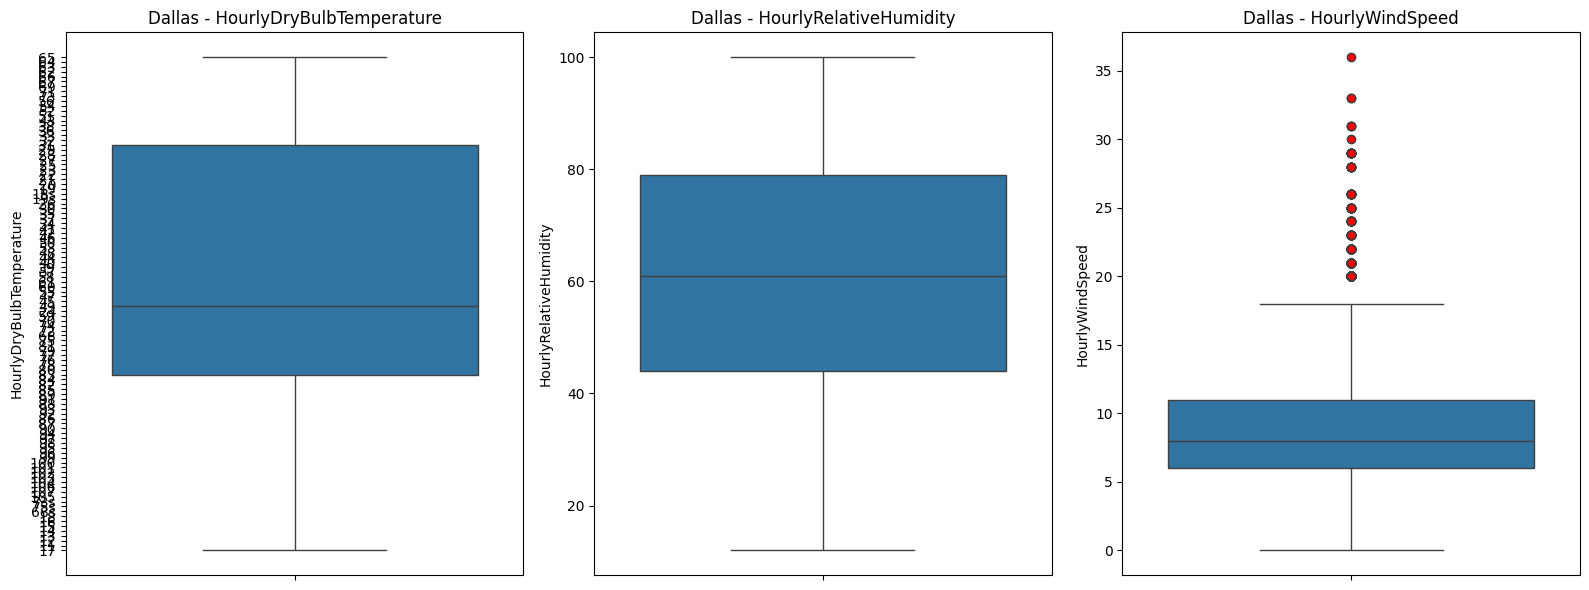

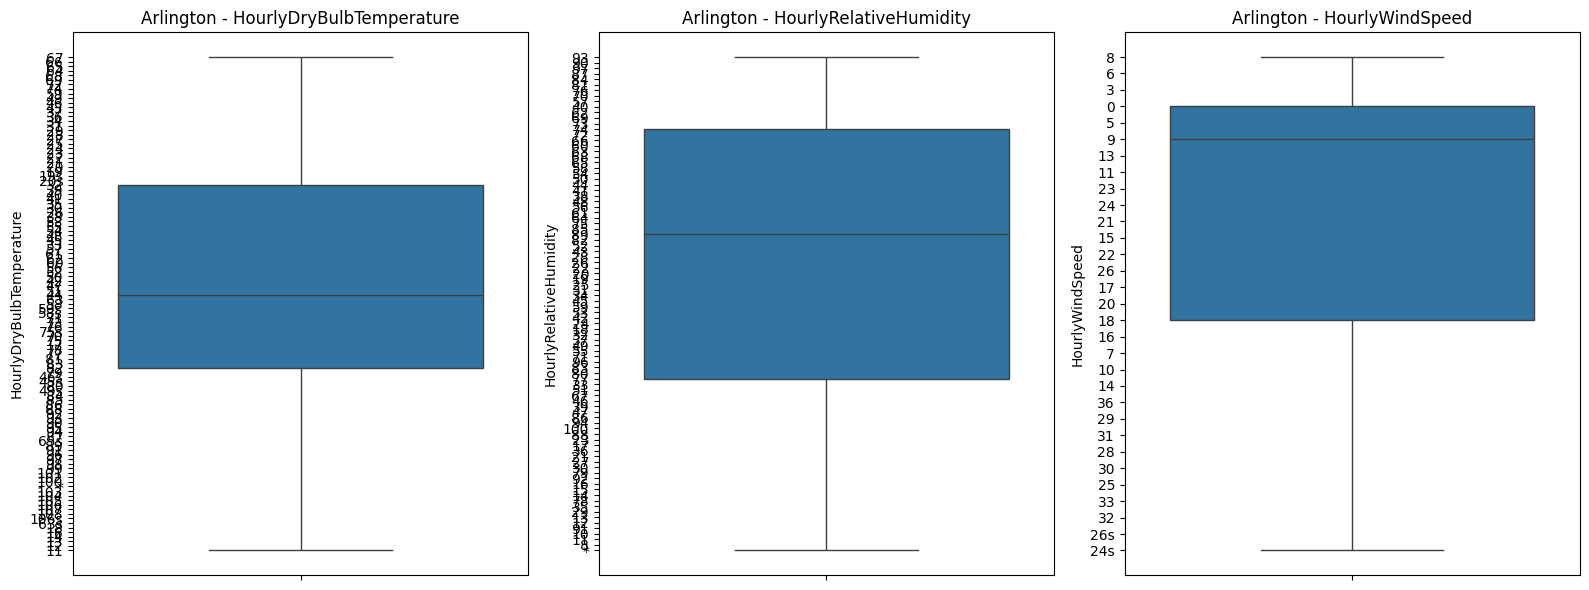

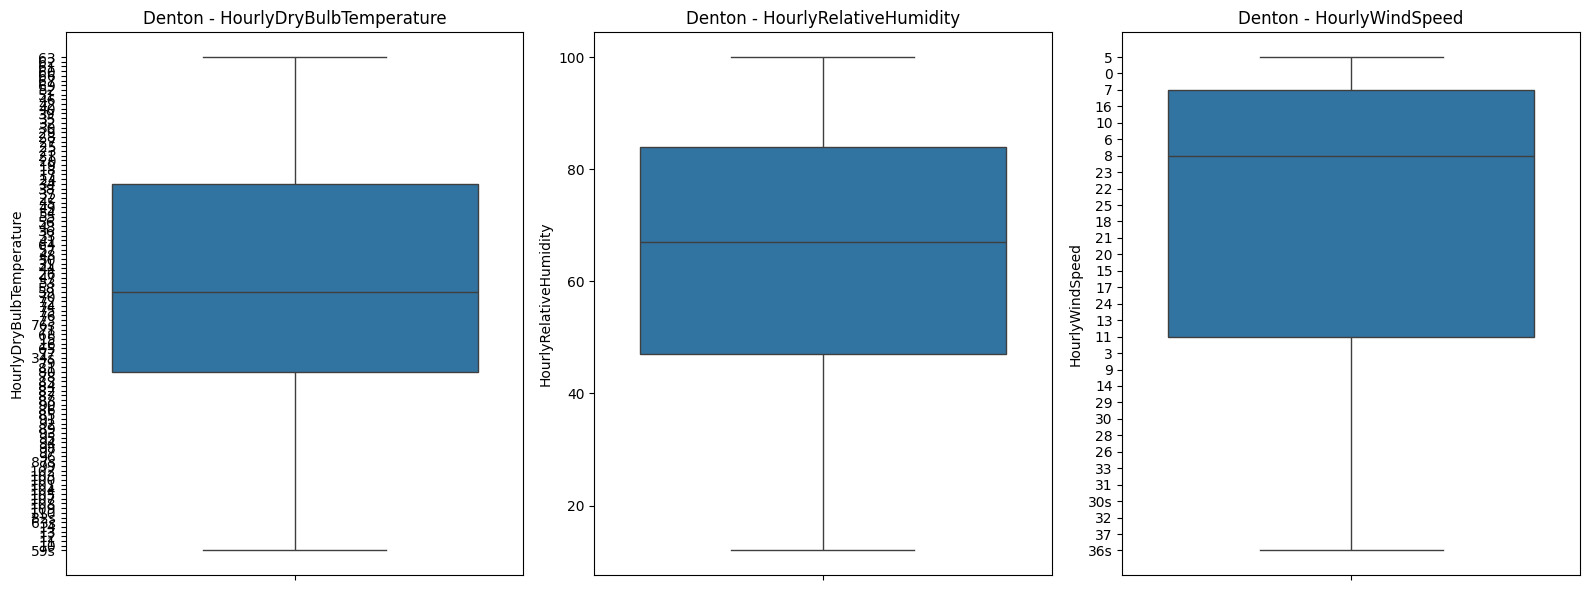

In [6]:
# Usage for each city
uhi_columns = ['HourlyDryBulbTemperature', 'HourlyRelativeHumidity', 'HourlyWindSpeed']
plot_uhi_boxplots(dallas, uhi_columns, city_name='Dallas')
plot_uhi_boxplots(arlington, uhi_columns, city_name='Arlington')
plot_uhi_boxplots(denton, uhi_columns, city_name='Denton')

In [7]:
# Usage for each city
plot_day_night_temperature(dallas, city_name='Dallas')
plot_day_night_temperature(arlington, city_name='Arlington')
plot_day_night_temperature(denton, city_name='Denton')


TypeError: can only concatenate str (not "int") to str